In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model
from scipy import stats

In [93]:
path = "Energobilance.xlsx"
df1 = pd.read_excel(path, 'Sheet1')

df2 = pd.read_excel(path, 'Sheet2')
df3 = pd.read_excel(path, 'Sheet3')

In [94]:
df1 = df1.fillna(0)
df1 = df1.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 6', 'Unnamed: 10', 'Unnamed: 14', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)
df1 = df1.drop([0, 1, 2, 7])

In [95]:
df1

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 15,Unnamed: 16,Unnamed: 17
3,"Janvāris, MWh","Februāris, MWh","Marts, MWh","Aprīlis, MWh","Maijs, MWh","Jūnijs, MWh","Jūlijs, MWh","Augusts, MWh","Septembris, MWh","Oktobris, MWh","Novembris, MWh","Decembris, MWh"
4,1461.42,1246.232,1166.984,838.028,229.081,49.792,43.41,40.29,42.286,196.709,745.68,1289.38
5,1474.406,1311.216,1331.983,1188.073,1206.82,1245.09,1344.14,1497.092,1178.11,1196.125,1261.43,1447.343
6,729.78,770.03,351.7,356.32,308.62,354.71,350.59,306.3,303.81,316.79,641.24,1042.88


In [96]:
x = [_+1 for _ in range(0, 12)]
y = df1.iloc[3].values

xarr = np.array(x)
yarr = np.array(y)

xarr = xarr.reshape(len(x),1)
yarr = yarr.reshape(len(y),1)

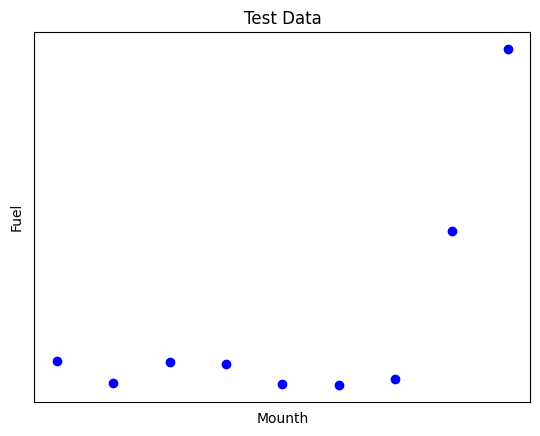

In [98]:
#plt.plot(x, y)
x_train = x[:-9]
x_test = x[-9:]

# Split the targets into training/testing sets
y_train = y[:-9]
y_test = y[-9:]

plt.scatter(x_test, y_test,  color='blue')
plt.title('Test Data')
plt.xlabel('Mounth')
plt.ylabel('Fuel')
plt.xticks(())
plt.yticks(())

plt.show()


In [99]:
data = {
  "result": {
    "watts": {
      "2023-10-07 07:39:37": 0,
      "2023-10-07 08:00:00": 70,
      "2023-10-07 09:00:00": 258,
      "2023-10-07 10:00:00": 506,
      "2023-10-07 11:00:00": 693,
      "2023-10-07 12:00:00": 917,
      "2023-10-07 13:00:00": 1100,
      "2023-10-07 14:00:00": 1022,
      "2023-10-07 15:00:00": 904,
      "2023-10-07 16:00:00": 666,
      "2023-10-07 17:00:00": 343,
      "2023-10-07 18:00:00": 128,
      "2023-10-07 18:44:26": 0,
      "2023-10-08 07:41:43": 0,
      "2023-10-08 08:00:00": 354,
      "2023-10-08 09:00:00": 688,
      "2023-10-08 10:00:00": 1015,
      "2023-10-08 11:00:00": 1288,
      "2023-10-08 12:00:00": 1413,
      "2023-10-08 13:00:00": 1304,
      "2023-10-08 14:00:00": 1028,
      "2023-10-08 15:00:00": 840,
      "2023-10-08 16:00:00": 614,
      "2023-10-08 17:00:00": 358,
      "2023-10-08 18:00:00": 131,
      "2023-10-08 18:41:46": 0
    },
    "watt_hours_period": {
      "2023-10-07 07:39:37": 0,
      "2023-10-07 08:00:00": 12,
      "2023-10-07 09:00:00": 164,
      "2023-10-07 10:00:00": 382,
      "2023-10-07 11:00:00": 600,
      "2023-10-07 12:00:00": 805,
      "2023-10-07 13:00:00": 1009,
      "2023-10-07 14:00:00": 1061,
      "2023-10-07 15:00:00": 963,
      "2023-10-07 16:00:00": 785,
      "2023-10-07 17:00:00": 505,
      "2023-10-07 18:00:00": 236,
      "2023-10-07 18:44:26": 47,
      "2023-10-08 07:41:43": 0,
      "2023-10-08 08:00:00": 54,
      "2023-10-08 09:00:00": 521,
      "2023-10-08 10:00:00": 852,
      "2023-10-08 11:00:00": 1152,
      "2023-10-08 12:00:00": 1351,
      "2023-10-08 13:00:00": 1359,
      "2023-10-08 14:00:00": 1166,
      "2023-10-08 15:00:00": 934,
      "2023-10-08 16:00:00": 727,
      "2023-10-08 17:00:00": 486,
      "2023-10-08 18:00:00": 245,
      "2023-10-08 18:41:46": 46
    },
    "watt_hours": {
      "2023-10-07 07:39:37": 0,
      "2023-10-07 08:00:00": 12,
      "2023-10-07 09:00:00": 176,
      "2023-10-07 10:00:00": 558,
      "2023-10-07 11:00:00": 1158,
      "2023-10-07 12:00:00": 1963,
      "2023-10-07 13:00:00": 2972,
      "2023-10-07 14:00:00": 4033,
      "2023-10-07 15:00:00": 4996,
      "2023-10-07 16:00:00": 5781,
      "2023-10-07 17:00:00": 6286,
      "2023-10-07 18:00:00": 6522,
      "2023-10-07 18:44:26": 6569,
      "2023-10-08 07:41:43": 0,
      "2023-10-08 08:00:00": 54,
      "2023-10-08 09:00:00": 575,
      "2023-10-08 10:00:00": 1427,
      "2023-10-08 11:00:00": 2579,
      "2023-10-08 12:00:00": 3930,
      "2023-10-08 13:00:00": 5289,
      "2023-10-08 14:00:00": 6455,
      "2023-10-08 15:00:00": 7389,
      "2023-10-08 16:00:00": 8116,
      "2023-10-08 17:00:00": 8602,
      "2023-10-08 18:00:00": 8847,
      "2023-10-08 18:41:46": 8893
    },
    "watt_hours_day": {
      "2023-10-07": 6569,
      "2023-10-08": 8893
    }
  },
  "message": {
    "code": 0,
    "type": "success",
    "text": "",
    "pid": "nk14a9L2",
    "info": {
      "latitude": 56.9208,
      "longitude": 23.9708,
      "distance": 0,
      "place": "Riga International Airport, Cildas, Piestātnes iela, Mārupes pagasts, LV-2167, Latvia",
      "timezone": "Europe/Riga",
      "time": "2023-10-07T16:09:33+03:00",
      "time_utc": "2023-10-07T13:09:33+00:00"
    },
    "ratelimit": {
      "period": 3600,
      "limit": 12,
      "remaining": 5
    }
  }
}

In [103]:
wats = 0

for i in data["result"]["watts"]:
    wats += data["result"]["watts"][i]
    
print(wats)

15640


In [ ]:
capacity = 23000000 #W

